<b><font size="5">Figure 6

Visualize peak-to-trough ratio and rise-to-fall ratio with PAC

<b>Imports

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
#python packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pac

import seaborn as sns
sns.set_style('white')

import imp
import shape
import utils

imp.reload(utils)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<module 'utils' from '/Users/nick/Documents/brainwaves/Cole_2017-master/utils.py'>

<b>Load data and calculate waveform shape metrics and PAC

In [5]:
widthS = 3
Fs, t, S, Sc, flo, fhi = utils.loadmeta()
eeg,rejects = utils.loadPD()
pac = utils.measure_pac(eeg,rejects, flo, fhi, Fs=Fs)
pks,trs,ShR,PTR,StR,RDR = utils.measure_shape(eeg,rejects, widthS=widthS)

/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.ar

We observed a negative correlation between the peak-to-trough and rise-to-fall ratios of the oscillations (spearman, r = -0.73, p = 4e-11). 

In [56]:
#sharpness ratio and steepness ratio data is pooled to find correlation
allpt = np.log10(np.hstack((PTR['off'],PTR['on'])))
allrd = np.log10(np.hstack((RDR['off'],RDR['on'])))
print(sp.stats.spearmanr(allpt, allrd))

SpearmanrResult(correlation=-0.728589298123697, pvalue=4.148886537756389e-11)


<b><font size="5">A

Peak-to-trough ratio versus rise-to-fall ratio over sensorimotor channels (C3 and C4) shown separately. Circles represent off medication, while squares represent on medication. The color map corresponds to PAC values to demonstrate if particular shapes are associated with particular PAC values.

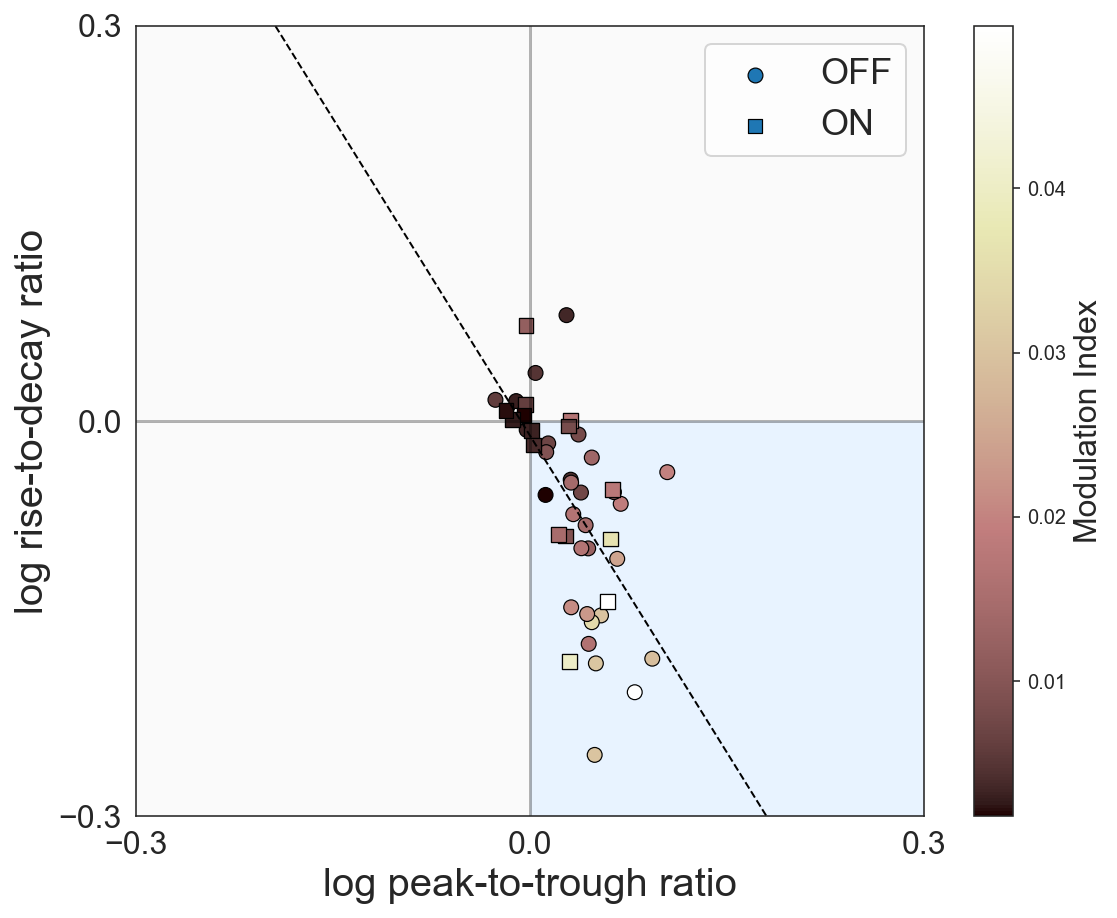

In [61]:
M = .3
mb = np.polyfit(allpt, allrd,1)
xs = np.array([-M,M])
yfit = mb[1] + xs*mb[0]
plt.figure(figsize=(8,6.5))

colors='pink'#inferno#plasma#viridis#bone
faces='.98'
alphas=1
sizes=55
lw=0.6

plt.fill_between([0,M], [0,0], [M,M], facecolor=faces, alpha=alphas, interpolate=True)
plt.fill_between([-M,0], [0,0], [-M,-M], facecolor=faces, alpha=alphas, interpolate=True)
plt.fill_between([0,M], [0,0], [-M,-M], facecolor='dodgerblue', alpha=0.1, interpolate=True)
plt.fill_between([-M,0], [0,0], [M,M], facecolor=faces, alpha=alphas, interpolate=True)
plt.plot(xs, yfit, 'k--',linewidth=1)
plt.plot([-M,M],[0,0],'k-',alpha=.3)
plt.plot([0,0],[-M,M],'k-',alpha=.3)
plt.xlabel('log peak-to-trough ratio',size=20)
plt.ylabel('log rise-to-decay ratio',size=20)
plt.xlim((-M,M))
plt.ylim((-M,M))
plt.xticks([-M,0,M],size=16)
plt.yticks([-M,0,M],size=16)
plt.legend(loc='best',fontsize=16)

plt.scatter(np.log10(PTR['off']), np.log10(RDR['off']),\
            c=pac['off'], s=sizes,cmap=colors,alpha=1,linewidths=lw,edgecolors='black',label="OFF", marker="o")
plt.scatter(np.log10(PTR['on']), np.log10(RDR['on']),\
            c=pac['on'], s=sizes,cmap=colors,alpha=1,linewidths=lw,edgecolors='black',label="ON",marker="s")#label="on"


colorb=plt.colorbar(label='Modulation Index')
colorb.set_label(label='Modulation Index',size='16')
plt.legend(loc='best',fontsize=18)


plt.tight_layout()
#plt.savefig('WaveshapeTemp.eps', format='eps', dpi=1000)

<b><font size="5">C

Shows the representative waveform shape for each quadrant. Quadrant 4 (blue) exhibits sharper peaks and steeper decays.

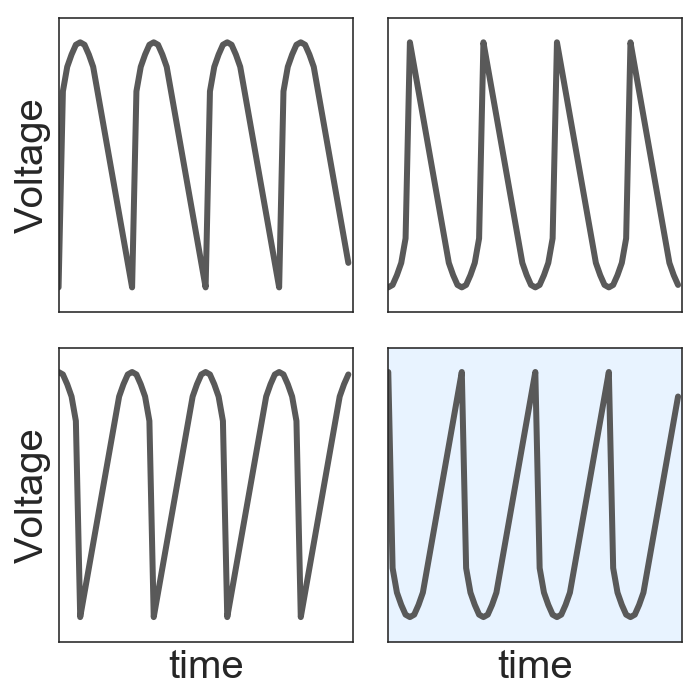

In [53]:
Ncycles = 4
cw = np.array([0,.01,.05,.1,.2,1,.9,.8,.7,.6,.5,.4,.3,.2,.1,.05,.01])
cw = np.tile(cw,(Ncycles))
tc = np.arange(len(cw))

iw = np.array([0,.8,.9,.95,.99,1,.99,.95,.9,.8,.7,.6,.5,.4,.3,.2,.1])
iw = -iw + 1
iw = np.tile(iw,(Ncycles))
ti = np.arange(len(cw))
lineg='.35'

plt.figure(figsize=(5,5))
plt.subplot(2,2,2)
plt.plot(tc,cw,lineg,linewidth=3)
plt.xticks([],[],visible=False)
plt.ylim((-.1,1.1))
plt.yticks([],[],visible=False)
plt.xlim((0,len(tc)))

plt.subplot(2,2,4)
plt.plot(ti,iw,lineg,linewidth=3)
plt.fill_between([0,100],[-5,-5],[100,0], facecolor='dodgerblue', alpha=0.1, interpolate=True)
plt.xticks([],[],visible=False)
plt.yticks([],[],visible=False)
plt.xlabel('time',size=20)
plt.ylim((-.1,1.1))
plt.xlim((0,len(tc)))

plt.subplot(2,2,3)
plt.plot(tc,-cw,lineg,linewidth=3)
plt.ylabel('Voltage',size=20)
plt.xlabel('time',size=20)
plt.xticks([],[],visible=False)
plt.ylim((-1.1,.1))
plt.yticks([],[],visible=False)
plt.xlim((0,len(tc)))

plt.subplot(2,2,1)
plt.plot(ti,-iw,lineg,linewidth=3)
plt.xticks([],[],visible=False)
plt.ylabel('Voltage',size=20)
plt.yticks([],[],visible=False)
plt.ylim((-1.1,.1))
plt.xlim((0,len(tc)))
plt.tight_layout()

#plt.savefig('WaveshapeKey.eps', format='eps', dpi=1000)

<b><font size="5">Additional Analysis

In [ ]:
#to add